In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import gengamma
%matplotlib inline

# Непрерывное Гамма-распределение

Сгенерируем выборку объёма 1000 из гамма-распределения с параметром a=2.5 и коэффициентом масштабирования с=1 :

In [2]:
a = 2.5
c = 1
gamma_rv = sts.gengamma(a,c)
sample = gamma_rv.rvs(size=1000)

Теперь построим гистограмму выборки и теоретическую плотность распределения на одном графике:

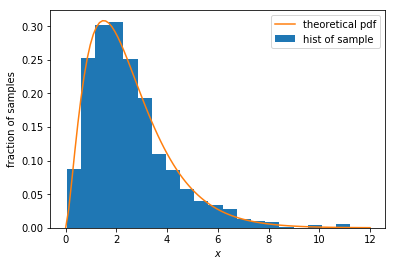

In [3]:
plt.hist(sample, bins=20, density=True, label = 'hist of sample') # гистограмма выборки
x = np.linspace(0,12,100)
pdf = gamma_rv.pdf(x) # теор. плотность распределения
plt.plot(x, pdf, label='theoretical pdf')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

Среднее и дисперсия для величины, имеющей гамма-распределение равны: EX=ac; DX=ac^2

То есть mean = 2.5, var = 2.5

Проверяем с помощью функции расчета первых моментов для исходной случайной величины:

In [4]:
 mean, var, skew, kurt = gengamma.stats(a, c, moments='mvsk')

In [5]:
print (mean, var)

2.5 2.5


# Распределение выборочного среднего при разных объемах выборки

Сгенерируем 1000 выборок объема n = 5, 10, 15 и посчитаем выборочное среднее:

In [6]:
mean_samp1 = []
mean_samp2 = []
mean_samp3 = []
n1 = 5
n2 = 10
n3 = 50
print("mean_th:", mean)
for i in range (1000):
    gamma_rv1 = sts.gengamma(a,c)
    sample1 = gamma_rv1.rvs(size=n1)
    mean_samp1.append(np.mean(sample1))
    m1 = round(np.mean((mean_samp1)), 4)
    v1 = round(np.var((mean_samp1)), 4)
print("mean_samp:", m1, ";   var_samp:", v1 , " var_th:", mean/n1)
for i in range (1000):
    gamma_rv2 = sts.gengamma(a,c)
    sample2 = gamma_rv2.rvs(size=n2)
    mean_samp2.append(np.mean(sample2))
    m2 = round(np.mean((mean_samp2)), 4)
    v2 = round(np.var((mean_samp2)), 4)
print("mean_samp:", m2, ";   var_samp:", v2, " var_th:", mean/n2)
for i in range (1000):
    gamma_rv3 = sts.gengamma(a,c)
    sample3 = gamma_rv3.rvs(size=n3)
    mean_samp3.append(np.mean(sample3))
    m3 = round(np.mean((mean_samp3)), 4)
    v3 = round(np.var((mean_samp3)), 4)
print("mean_samp:", m3, ";   var_samp:", v3, " var_th:", mean/n3)

mean_th: 2.5
mean_samp: 2.4721 ;   var_samp: 0.4913  var_th: 0.5
mean_samp: 2.5317 ;   var_samp: 0.2352  var_th: 0.25
mean_samp: 2.5132 ;   var_samp: 0.0551  var_th: 0.05


mean_th и var_th - это теоретические среднее и дисперсия нормального распределения, описывающего распределение выборочных средних (по ЦПТ)

Ожидаемые значения совпадают с расчетными

Теперь построим гистограммы и функции плотностей распределения соответствующих нормальных распределний:

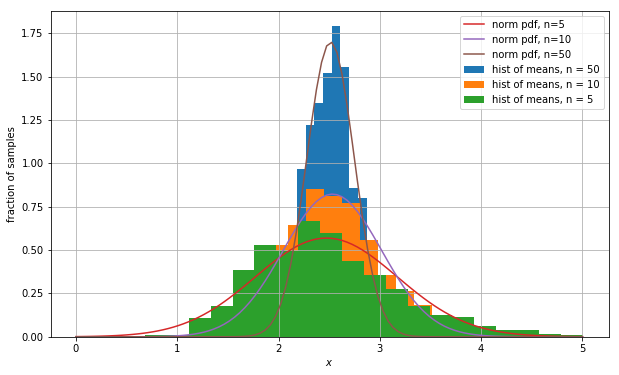

In [9]:
plt.rcParams["figure.figsize"] = 10,6
plt.rcParams["axes.grid"] = True
plt.hist(mean_samp3,bins=20, density=True, label = 'hist of means, n = 50')
plt.hist(mean_samp2,bins=20, density=True, label = 'hist of means, n = 10')
plt.hist(mean_samp1,bins=20, density=True, label = 'hist of means, n = 5')
x = np.linspace(0,5,100)
norm_rv1 = sts.norm(m1,np.sqrt(v1))
pdf1 = norm_rv1.pdf(x) 
plt.plot(x, pdf1, label='norm pdf, n=5')
norm_rv2 = sts.norm(m2,np.sqrt(v2))
pdf2 = norm_rv2.pdf(x)
plt.plot(x, pdf2, label='norm pdf, n=10')
norm_rv3 = sts.norm(m3,np.sqrt(v3))
pdf3 = norm_rv3.pdf(x) 
plt.plot(x, pdf3, label='norm pdf, n=50')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

На совместном графике гистограмм видно, что с ростом n форма исходной плотности случайной величины (более широкая и смещенная относительно mean влево) приобретает форму нормального распределения (центрируется и становится более узкой) 
C ростом объема выборки n точность нормальной аппроксимации возрастает